In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

df = pd.read_csv('games_early.csv')
print(df.shape)
df.head()

(480, 27)


,year,region,round,high_bracket_seed,high_team_id,low_bracket_seed,low_team_id,win,wab,barthag,...,drb_pct,ftr,ftrd,2p_pct,2pd_pct,3p_pct,3pd_pct,3pr,3prd,adj_tempo
0,2021,East,First Round,16,2021 Utah Valley,1,2021 Stanford,0,-17.0,-0.6235,...,35.1,-43.7,58.4,-16.7,6.8,-44.1,31.6,-30.3,31.6,-4.9
1,2021,East,Second Round,8,2021 Oklahoma St.,1,2021 Stanford,0,-8.7,-0.0348,...,31.4,-51.6,58.5,-17.9,10.2,-39.6,28.4,-39.2,33.5,0.3
2,2022,South,First Round,16,2022 Howard,1,2022 South Carolina,0,-22.8,-0.7805,...,22.1,-42.8,34.3,-23.0,13.2,-47.9,41.5,-46.6,42.0,5.2
3,2022,South,Second Round,8,2022 Miami FL,1,2022 South Carolina,0,-12.7,-0.0693,...,23.4,-54.3,39.9,-20.3,10.6,-42.8,38.8,-41.8,43.0,1.1
4,2023,South,First Round,16,2023 Norfolk St.,1,2023 South Carolina,0,-19.2,-0.5174,...,19.0,-43.0,31.2,-22.9,12.2,-50.1,43.0,-45.4,36.4,0.7


In [2]:
df['win'].value_counts(normalize=True)

0    0.5
1    0.5
Name: win, dtype: float64

In [3]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_team_id',
       'low_bracket_seed', 'low_team_id', 'win', 'wab', 'barthag', 'adj_oe',
       'adj_de', 'efg_pct', 'efgd_pct', 'tor', 'tord', 'orb_pct', 'drb_pct',
       'ftr', 'ftrd', '2p_pct', '2pd_pct', '3p_pct', '3pd_pct', '3pr', '3prd',
       'adj_tempo'],
      dtype='object')

In [4]:
split_df = df.drop(['year', 'region', 'round', 'high_bracket_seed', 'high_team_id', 'low_bracket_seed', 'low_team_id'],axis=1)
print(split_df.shape)
split_df.head()

(480, 20)


,win,wab,barthag,adj_oe,adj_de,efg_pct,efgd_pct,tor,tord,orb_pct,drb_pct,ftr,ftrd,2p_pct,2pd_pct,3p_pct,3pd_pct,3pr,3prd,adj_tempo
0,0,-17.0,-0.6235,-40.3,-15.9,-16.4,3.7,-53.0,60.8,-43.0,35.1,-43.7,58.4,-16.7,6.8,-44.1,31.6,-30.3,31.6,-4.9
1,0,-8.7,-0.0348,-25.5,-0.9,-15.4,4.7,-58.6,58.8,-42.9,31.4,-51.6,58.5,-17.9,10.2,-39.6,28.4,-39.2,33.5,0.3
2,0,-22.8,-0.7805,-48.2,-7.6,-23.0,12.9,-57.1,53.5,-38.9,22.1,-42.8,34.3,-23.0,13.2,-47.9,41.5,-46.6,42.0,5.2
3,0,-12.7,-0.0693,-35.2,8.5,-18.9,9.9,-56.2,52.3,-42.1,23.4,-54.3,39.9,-20.3,10.6,-42.8,38.8,-41.8,43.0,1.1
4,0,-19.2,-0.5174,-48.8,-6.0,-23.7,12.4,-54.7,50.4,-39.5,19.0,-43.0,31.2,-22.9,12.2,-50.1,43.0,-45.4,36.4,0.7


In [5]:
split_df.columns

Index(['win', 'wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'tor', 'tord', 'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr', '3prd', 'adj_tempo'],
      dtype='object')

In [6]:
X = df[['wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'tor', 'tord', 'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr', '3prd', 'adj_tempo']]
Y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(336, 20)
(144, 20)


## I. Filter Methods

### A. Box Plots

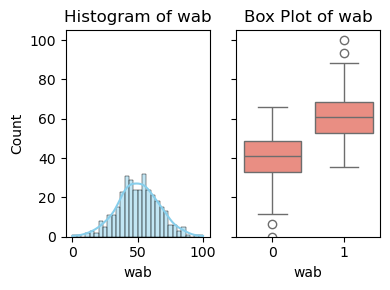

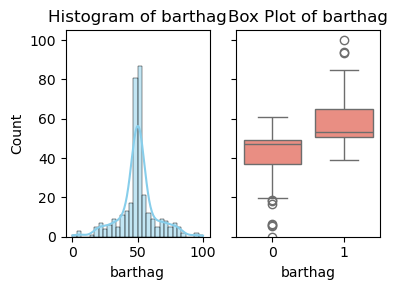

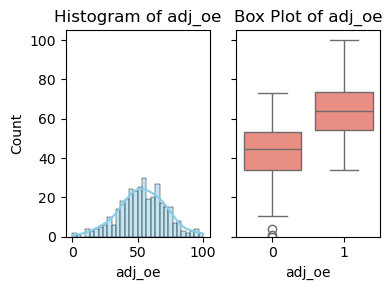

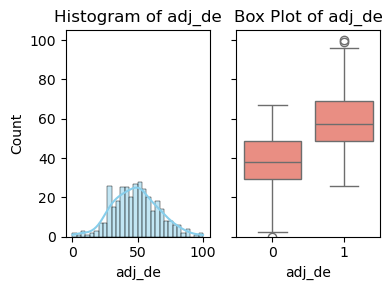

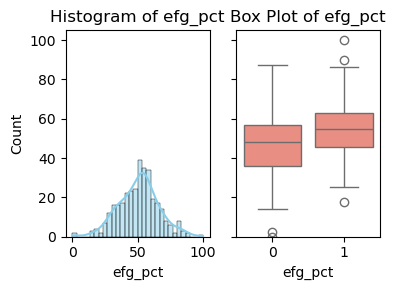

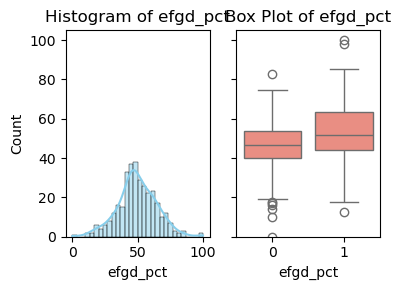

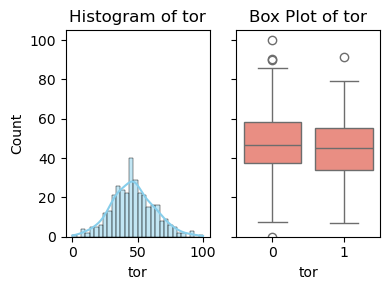

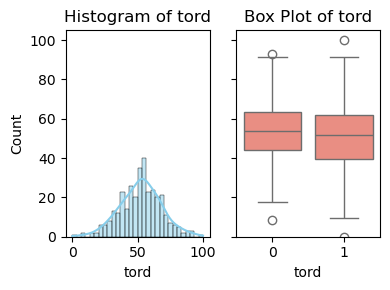

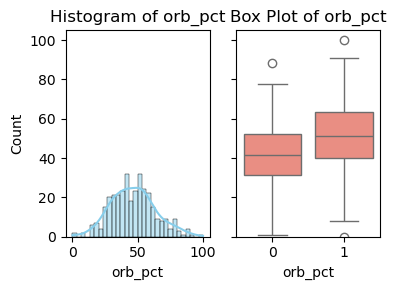

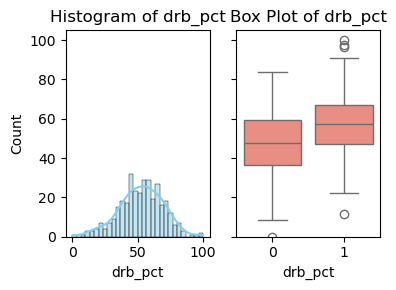

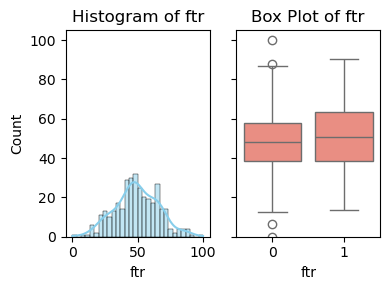

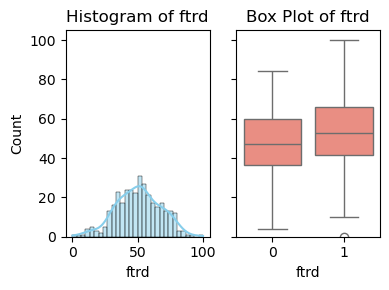

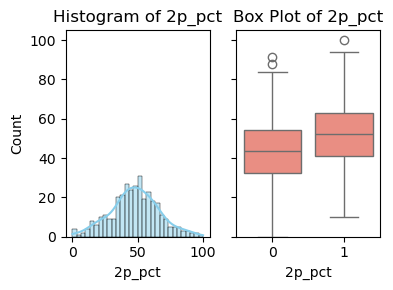

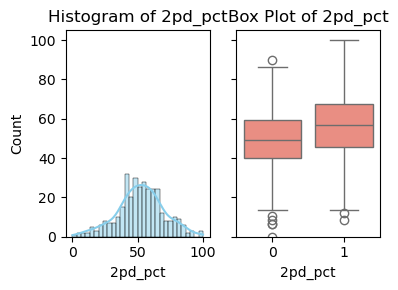

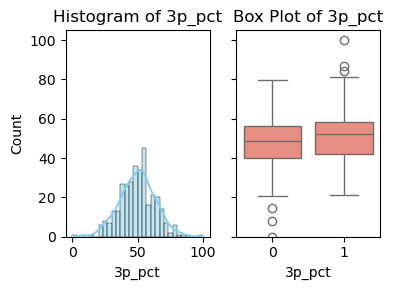

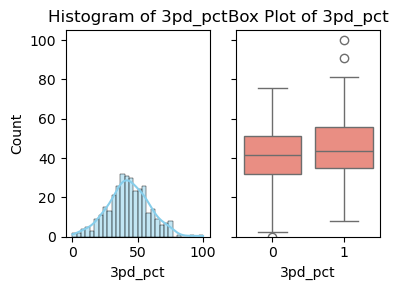

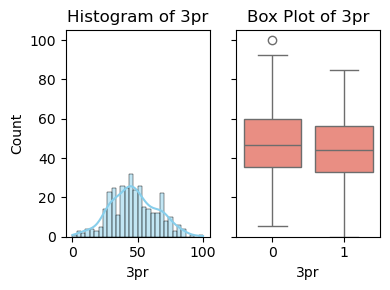

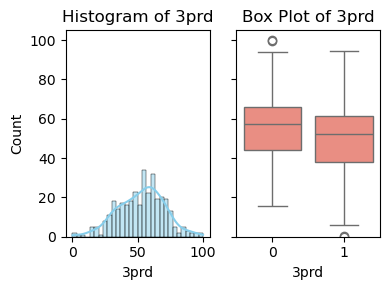

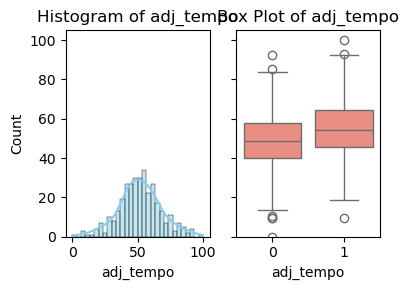

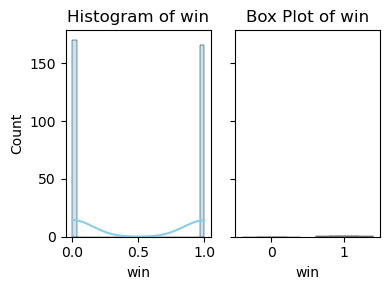

In [7]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_df
numeric_columns = train_df.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

### B. Correlation

In [8]:
corr_matrix = train_df.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 5]
print(correlation_with_target)

wab           66.28
barthag       58.32
adj_oe        60.35
adj_de        58.19
efg_pct       25.61
efgd_pct      24.49
tor            6.88
tord           6.28
orb_pct       29.40
drb_pct       28.42
ftr            7.51
ftrd          14.26
2p_pct        26.52
2pd_pct       23.69
3p_pct        12.47
3pd_pct       15.23
3pr            8.24
3prd          14.64
adj_tempo     20.33
win          100.00
Name: win, dtype: float64


### C. Statistical Tests

In [9]:
X = train_df[['wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'tor', 'tord', 'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3pr', '3prd', 'adj_tempo']]
y = train_df['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,261.646087,7.233677e-44,0.339840
1,barthag,172.188565,5.211040e-32,0.299514
2,adj_oe,191.304903,1.032293e-34,0.217030
3,adj_de,171.031613,7.653039e-32,0.250843
4,efg_pct,23.453501,1.960917e-06,0.026901
5,efgd_pct,21.315287,5.565787e-06,0.031303
6,tor,1.587304,2.085914e-01,0.000485
7,tord,1.320387,2.513447e-01,0.000000
8,orb_pct,31.594959,4.011695e-08,0.037780
9,drb_pct,29.357521,1.154170e-07,0.051621


In [10]:
feature_df = stats_df[stats_df['mutual_info'] > 0]
feature_df

,feature,f_values,p_values,mutual_info
0,wab,261.646087,7.233677e-44,0.339840
1,barthag,172.188565,5.211040e-32,0.299514
2,adj_oe,191.304903,1.032293e-34,0.217030
3,adj_de,171.031613,7.653039e-32,0.250843
4,efg_pct,23.453501,1.960917e-06,0.026901
5,efgd_pct,21.315287,5.565787e-06,0.031303
6,tor,1.587304,2.085914e-01,0.000485
8,orb_pct,31.594959,4.011695e-08,0.037780
9,drb_pct,29.357521,1.154170e-07,0.051621
10,ftr,1.893174,1.697663e-01,0.023021


## II. Wrapper Methods

### A. Forward Selection

In [11]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Forward Selection using AIC
def forward_selection_logistic_aic(X_train, y_train, X_test, y_test):
    selected_features = []
    remaining_features = list(X_train.columns)  # Column names
    best_f1_train = 0
    best_f1_test = 0
    best_aic = np.inf  # Start with a large AIC value
    
    while remaining_features:
        aic_list = []
        f1_train_list = []
        f1_test_list = []
        
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]
            
            # Add constant for intercept (statsmodels requires constant)
            X_train_subset_sm = sm.add_constant(X_train_subset)
            X_test_subset_sm = sm.add_constant(X_test_subset)
            
            # Fit the logistic regression model using statsmodels (to compute AIC)
            model = sm.Logit(y_train, X_train_subset_sm)
            result = model.fit()
            
            aic = result.aic  # Extract AIC value
            aic_list.append(aic)
            
            # Now, use sklearn for F1 score calculation
            log_reg_model = LogisticRegression(solver='liblinear')
            log_reg_model.fit(X_train_subset, y_train)  # Fit model without constant term
            
            # Make predictions on both train and test data
            y_train_pred = log_reg_model.predict(X_train_subset)
            y_test_pred = log_reg_model.predict(X_test_subset)
            
            # Calculate F1 scores
            f1_train = f1_score(y_train, y_train_pred)
            f1_test = f1_score(y_test, y_test_pred)
            
            f1_train_list.append(f1_train)
            f1_test_list.append(f1_test)
        
        # Select the feature that gives the lowest AIC
        best_feature_idx = np.argmin(aic_list)
        selected_features.append(remaining_features[best_feature_idx])
        remaining_features.remove(remaining_features[best_feature_idx])
        
        best_aic = aic_list[best_feature_idx]
        best_f1_train = f1_train_list[best_feature_idx]
        best_f1_test = f1_test_list[best_feature_idx]
        
    return selected_features, best_aic, best_f1_train, best_f1_test

# Perform forward selection using AIC
selected_features, best_aic, best_f1_train, best_f1_test = forward_selection_logistic_aic(
    X_train, y_train, X_test, y_test
)

# Output the results
print("Selected Features:", selected_features)
print("Best AIC:", best_aic)
print("Best F1 Score on Training Set:", best_f1_train)
print("Best F1 Score on Test Set:", best_f1_test)

# Create the final Logistic Regression model using selected features
log_reg_final = LogisticRegression(solver='liblinear')
X_train_final = X_train[selected_features]
X_test_final = X_test[selected_features]

# Fit the final model
log_reg_final.fit(X_train_final, y_train)

# Make predictions on training and testing sets
y_train_pred_final = log_reg_final.predict(X_train_final)
y_test_pred_final = log_reg_final.predict(X_test_final)

# Evaluate using F1 score
final_f1_train = f1_score(y_train, y_train_pred_final)
final_f1_test = f1_score(y_test, y_test_pred_final)

print("Final F1 Score on Training Set:", final_f1_train)
print("Final F1 Score on Test Set:", final_f1_test)

Optimization terminated successfully.
         Current function value: 0.391464
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.402174
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.460733
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.483424
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.658984
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.661951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.690705
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.691103
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.647877
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650864
  

### B. Recursive Feature Elimination

In [12]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame to keep track of column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Create a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Initialize RFE with logistic regression as the model and the number of features to select
rfe = RFE(estimator=log_reg, n_features_to_select=8)  # Select top 12 features

# Fit RFE on the scaled training data
rfe.fit(X_train_scaled, y_train)

# Get the selected features (column names)
selected_features = X_train_scaled.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train a logistic regression model using only the selected features
log_reg.fit(X_train_scaled[selected_features], y_train)

# Make predictions on both training and testing datasets
y_train_pred = log_reg.predict(X_train_scaled[selected_features])
y_test_pred = log_reg.predict(X_test_scaled[selected_features])

# Evaluate the F1 score on both training and testing datasets
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Output the results
print("F1 Score on Training Set:", acc_train)
print("F1 Score on Test Set:", acc_test)

Selected Features: Index(['wab', 'barthag', 'adj_oe', 'adj_de', 'tord', 'drb_pct', '2pd_pct',
       'adj_tempo'],
      dtype='object')
F1 Score on Training Set: 0.8363095238095238
F1 Score on Test Set: 0.8263888888888888


### C. Lasso Regression

In [13]:
# Create a Lasso Logistic Regression model (penalty='l1' for Lasso)
lasso_log_reg = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000)

# Fit the model on the training data
lasso_log_reg.fit(X_train_scaled, y_train)

# Make predictions on both training and testing datasets
y_train_pred = lasso_log_reg.predict(X_train_scaled)
y_test_pred = lasso_log_reg.predict(X_test_scaled)

# Evaluate the F1 score on both training and testing datasets
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# Output the results
print("Accuracy Score on Training Set:", acc_train)
print("Accuracy Score on Test Set:", acc_test)

# Get the non-zero coefficients (selected features) from the Lasso model
selected_features = X.columns[(lasso_log_reg.coef_ != 0).flatten()]
print("Selected Features (Columns used in the model):", selected_features)

Accuracy Score on Training Set: 0.8333333333333334
Accuracy Score on Test Set: 0.7986111111111112
Selected Features (Columns used in the model): Index(['wab', 'barthag', 'adj_oe', 'adj_de', 'efgd_pct', 'tor', 'tord',
       'orb_pct', 'drb_pct', '2pd_pct', '3p_pct', '3pr', '3prd', 'adj_tempo'],
      dtype='object')


## IV. Exhaustive Feature Selection

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled2 = X_train_scaled[[
       'wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3prd'
]]

X_test_scaled2 = X_test_scaled[[
       'wab', 'barthag', 'adj_oe', 'adj_de', 'efg_pct', 'efgd_pct',
       'orb_pct', 'drb_pct', 'ftr', 'ftrd', '2p_pct', '2pd_pct',
       '3p_pct', '3pd_pct', '3prd'
]]

In [15]:
# Initialize variables to track the best model
best_acc = 0
best_features = []
best_train_acc = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_acc = accuracy_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_acc > best_acc:
            best_acc = test_acc
            best_features = subset
            best_train_acc = train_acc

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test Accuracy Score: {best_acc:.4f}")
print(f"Training Accuracy Score of Best Model: {best_train_acc:.4f}")

Best Feature Subset: ('barthag', 'adj_oe', 'adj_de', 'orb_pct', 'drb_pct')
Best Test Accuracy Score: 0.8611
Training Accuracy Score of Best Model: 0.8304


## V. XGBoost

In [16]:
import optuna
import xgboost as xgb

In [21]:
# Objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'booster': 'gbtree',
        'tree_method': 'auto',
        'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.3),
        'max_depth': trial.suggest_int("max_depth", 3, 10),
        'min_child_weight': trial.suggest_float("min_child_weight", 1, 10),
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'gamma': trial.suggest_float("gamma", 0, 5),
        'reg_alpha': trial.suggest_float("reg_alpha", 0, 10),  # L1 regularization
        'reg_lambda': trial.suggest_float("reg_lambda", 0, 10),  # L2 regularization
        'n_estimators': trial.suggest_int("n_estimators", 50, 500)
    }

    # Train model
    model = xgb.XGBClassifier(**param, use_label_encoder=False, verbosity=0)
    model.fit(X_train_scaled2, y_train)

    # Predict and calculate accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled2))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled2))

    # Log both accuracies
    trial.set_user_attr("train_accuracy", train_acc)
    trial.set_user_attr("test_accuracy", test_acc)

    return test_acc  # Optimization target

In [22]:
# Run the study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

# Print best trial
best = study.best_trial
print("Best Trial:")
print(f"  Test Accuracy: {best.value:.4f}")
print(f"  Train Accuracy: {best.user_attrs['train_accuracy']:.4f}")
print("  Params:")
for key, value in best.params.items():
    print(f"    {key}: {value}")

[I 2025-07-13 06:49:24,936] A new study created in memory with name: no-name-faa61d24-7189-4953-bcc5-79d0fd31cb13
[I 2025-07-13 06:49:25,071] Trial 0 finished with value: 0.7777777777777778 and parameters: {'learning_rate': 0.17524585261424735, 'max_depth': 4, 'min_child_weight': 2.7885186923998773, 'subsample': 0.6011536602910851, 'colsample_bytree': 0.8175012345632043, 'gamma': 0.6944608756535936, 'reg_alpha': 9.159629534831488, 'reg_lambda': 1.5478701582045817, 'n_estimators': 266}. Best is trial 0 with value: 0.7777777777777778.
[I 2025-07-13 06:49:25,179] Trial 1 finished with value: 0.7777777777777778 and parameters: {'learning_rate': 0.2083094493688102, 'max_depth': 9, 'min_child_weight': 7.472165061736761, 'subsample': 0.6681318777206616, 'colsample_bytree': 0.8817589998563018, 'gamma': 2.472772291464942, 'reg_alpha': 7.6390249414916775, 'reg_lambda': 4.727725402043569, 'n_estimators': 157}. Best is trial 0 with value: 0.7777777777777778.
[I 2025-07-13 06:49:25,357] Trial 2 fin

Best Trial:
  Test Accuracy: 0.8750
  Train Accuracy: 0.8899
  Params:
    learning_rate: 0.27389003859260186
    max_depth: 7
    min_child_weight: 3.5809771628877742
    subsample: 0.5426170461600486
    colsample_bytree: 0.5542944396906831
    gamma: 4.5944234720554835
    reg_alpha: 0.0027661992419757975
    reg_lambda: 1.0374026781525143
    n_estimators: 197
